In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
print("Sentiment Analysis Project - Data Exploration")
print("=" * 50)

Sentiment Analysis Project - Data Exploration


In [5]:
# Load the dataset
df = pd.read_csv('../data/raw/IMDB_Dataset.csv')

# Basic information
print(f"📈 Dataset Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*30)
# Display first few rows
print("🔍 First 5 rows:")
display(df.head())
# Check for missing values
print(f"\nMissing Values:")
print(df.isnull().sum())

📈 Dataset Shape: (50000, 2)
📋 Columns: ['review', 'sentiment']
💾 Memory Usage: 68.46 MB

🔍 First 5 rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



Missing Values:
review       0
sentiment    0
dtype: int64


📊 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


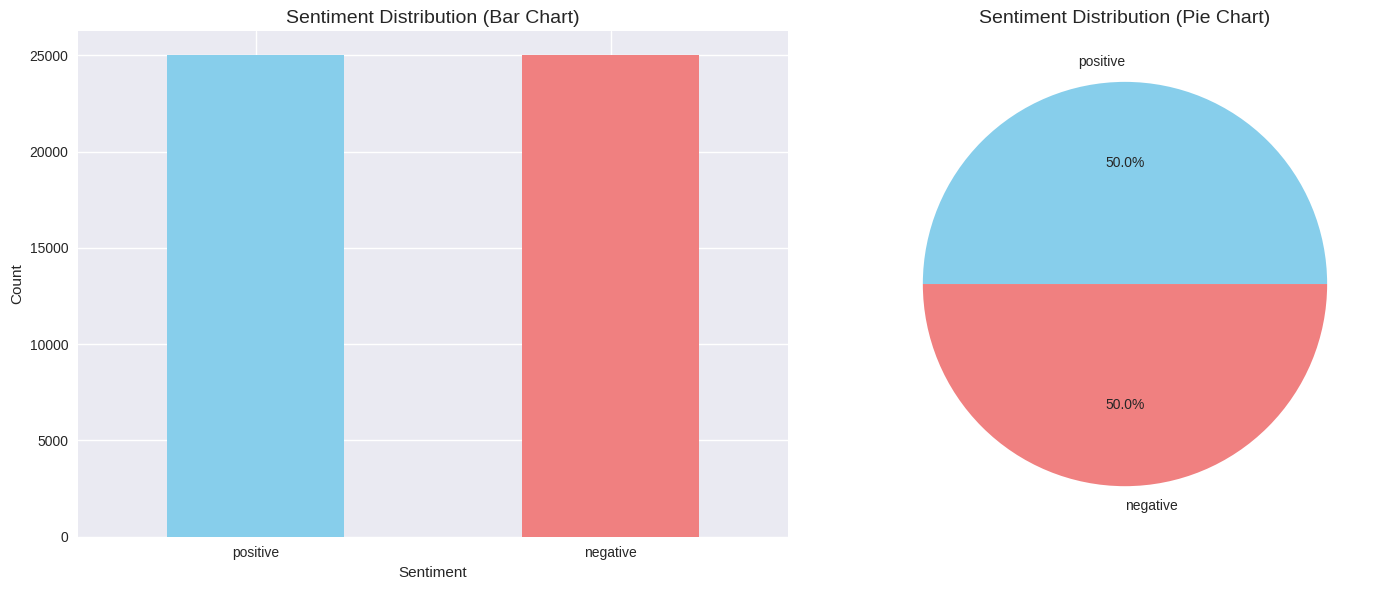

In [8]:
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("📊 Sentiment Distribution:")
print(sentiment_counts)
# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Bar plot
sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Sentiment Distribution (Bar Chart)', fontsize=14)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)
# Pie chart
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index,
autopct='%1.1f%%',
colors=['skyblue', 'lightcoral'])
ax2.set_title('Sentiment Distribution (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()

📏 Text Length Statistics by Sentiment:


review_length                                                        \
                  count        mean          std   min    25%    50%      75%   
sentiment                                                                       
negative        25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive        25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                   word_count                                             \
               max      count       mean         std   min    25%    50%   
sentiment                                                                  
negative    8969.0    25000.0  229.46456  164.947795   4.0  128.0  174.0   
positive   13704.0    25000.0  232.84932  177.497046  10.0  125.0  172.0   

                          
             75%     max  
sentiment                 
negative   278.0  1522.0  
positive   284.0  2470.0

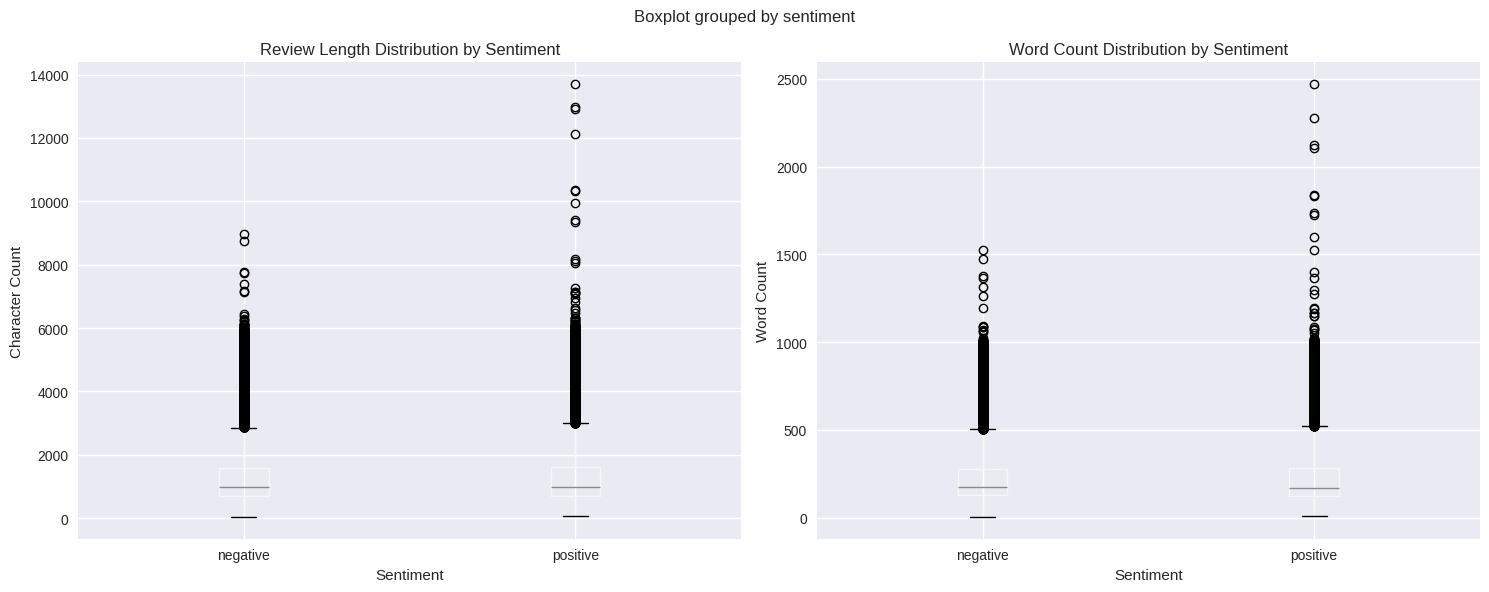

In [9]:
# Calculate review lengths
df['review_length'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()
# Statistics by sentiment
print("📏 Text Length Statistics by Sentiment:")
length_stats = df.groupby('sentiment')[['review_length',
'word_count']].describe()
display(length_stats)
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Character length distribution
df.boxplot(column='review_length', by='sentiment', ax=ax1)
ax1.set_title('Review Length Distribution by Sentiment')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Character Count')
# Word count distribution
df.boxplot(column='word_count', by='sentiment', ax=ax2)
ax2.set_title('Word Count Distribution by Sentiment')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Word Count')
plt.tight_layout()
plt.show()

In [16]:
# Display sample positive and negative reviews
print("✅ Sample Positive Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...")
    print()
print("❌ Sample Negative Reviews:")
print("-" * 50)
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1):
    print(f"{i}. {review[:200]}...")
    print()

✅ Sample Positive Reviews:
--------------------------------------------------
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...

3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

❌ Sample Negative Reviews:
--------------------------------------------------
1. Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...

2. This show